# Работа с городами Якутии

**Описание:**

Файл `yakutia_data.csv` содержит данные о погоде Республики Саха (Якутия).

**Структура:**
- `temperature_2m` - температура °C
- `relative_humidity_2m` - влажность в процентах
- `rain` - дождь
- `snowfall` - снег
- `snow_depth` - глубина снега в см
- `is_day` - день или ночь
- `precipitation` - осадки в мм
- `wind_direction_100m` - направление ветра
- `wind_speed_100m` - скорость ветра м/с
- `date` - дата
- `city_id` - координаты города

**Цель:**

Необходимо проанализировать полученные нами города из `merge_csv`. Посмотреть, есть ли аномалии, тенденции, изменение погоды в течение какого-то времени 

**Использование:**

`yakutia_data.csv`

In [1]:
# Установка необходимой библиотеки 
!pip install windrose

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes

In [3]:
# Читаем файл
yakt = pd.read_csv('yakutia_data.csv')

In [4]:
yakt.head()

,Unnamed: 0,temperature_2m,relative_humidity_2m,rain,snowfall,snow_depth,is_day,precipitation,wind_direction_100m,wind_speed_100m,date,city_id
0,2775976,-13.545,77.770870,0.0,0.84,0.42,False,1.2,268.09088,21.611998,1975-01-01 00:00:00,60.3729_120.4035
1,2775977,-13.595,76.152660,0.0,0.56,0.42,True,0.8,293.62940,18.861390,1975-01-01 06:00:00,60.3729_120.4035
2,2775978,-16.695,81.294685,0.0,0.07,0.41,False,0.1,258.92984,16.873980,1975-01-01 12:00:00,60.3729_120.4035
3,2775979,-16.495,82.371100,0.0,0.00,0.42,False,0.0,233.53067,20.592503,1975-01-01 18:00:00,60.3729_120.4035
4,2775980,-14.245,80.300750,0.0,0.28,0.42,False,0.4,223.63614,21.388970,1975-01-02 00:00:00,60.3729_120.4035


In [5]:
# Удалим ненужный столбец
yakt = yakt.drop('Unnamed: 0', axis=1)

In [6]:
yakt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875492 entries, 0 to 875491
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   temperature_2m        875492 non-null  float64
 1   relative_humidity_2m  875492 non-null  float64
 2   rain                  875492 non-null  float64
 3   snowfall              875492 non-null  float64
 4   snow_depth            875492 non-null  float64
 5   is_day                875492 non-null  bool   
 6   precipitation         875492 non-null  float64
 7   wind_direction_100m   875492 non-null  float64
 8   wind_speed_100m       875492 non-null  float64
 9   date                  875492 non-null  object 
 10  city_id               875492 non-null  object 
dtypes: bool(1), float64(8), object(2)
memory usage: 67.6+ MB


In [7]:
# приводим дату в корректный тип данных
yakt['date'] = pd.to_datetime(yakt['date'])

In [8]:
# извлечение года из даты
yakt['year'] = yakt['date'].dt.year

In [9]:
# вычисление средней температуры для каждого года
avg_temp_per_year = yakt.groupby('year')['temperature_2m'].mean().reset_index()

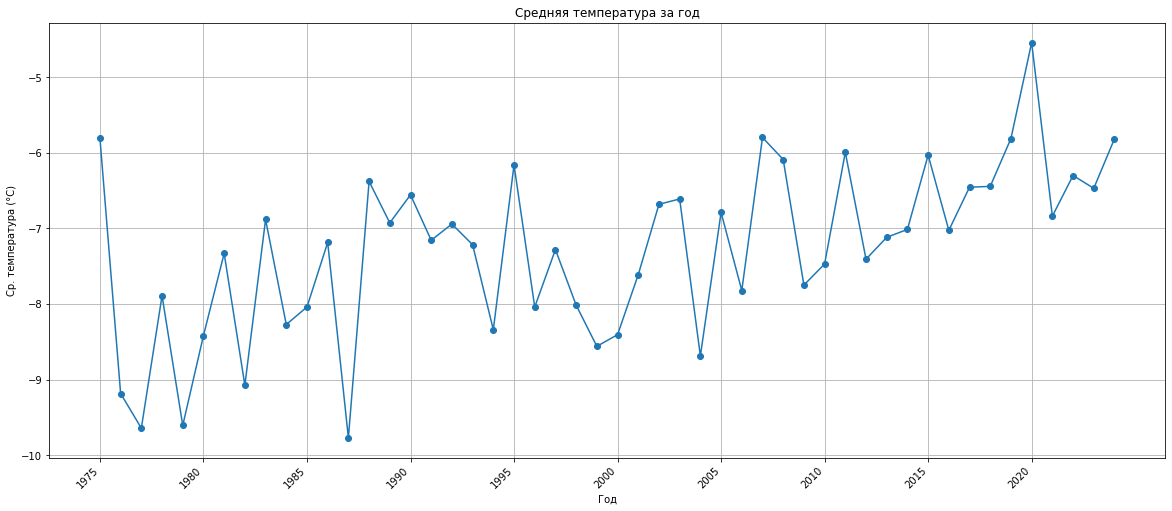

In [10]:
# построение графика средней температуры по годам
plt.figure(figsize=(20,8))
plt.plot(avg_temp_per_year['year'], avg_temp_per_year['temperature_2m'], marker='o')
plt.title('Средняя температура за год')
plt.xlabel('Год')
plt.ylabel('Ср. температура (°C)')

start_year = avg_temp_per_year['year'].min()
end_year = avg_temp_per_year['year'].max()
plt.xticks(np.arange(start_year, end_year + 1, 5), rotation=45, ha='right')

plt.grid(True)
plt.show()

Мы видим на графике, что средняя температура за год имеет тенденцию увеличиваться, то есть становится немного теплее. Хотя есть скачки понижения температуры, например, в 1976, 1986, 2004 и 2020.

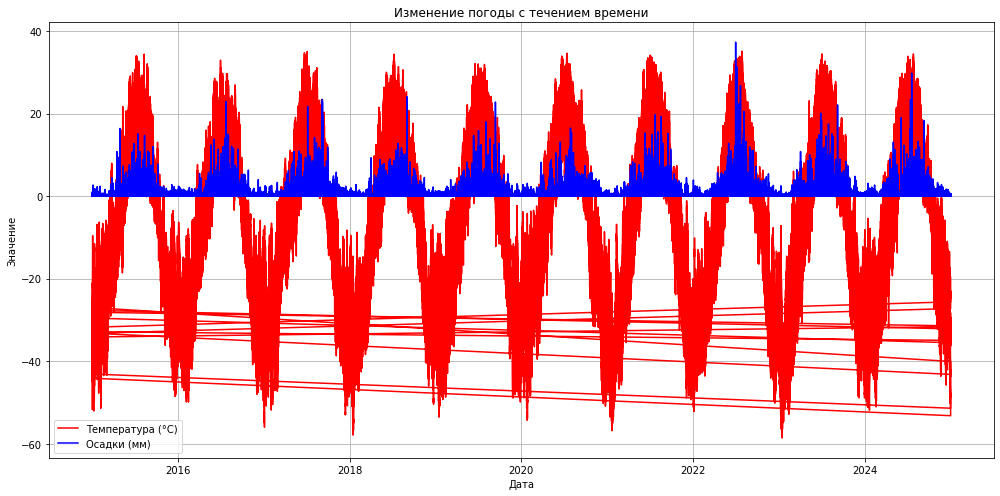

In [11]:
# Фильтрация данных за последние 10 лет
last_10_years = yakt[yakt['date'].dt.year >= 2015]

# Построение графика изменения температуры и осадков
plt.figure(figsize=(14, 7))

# График температуры
plt.plot(last_10_years['date'], last_10_years['temperature_2m'], label='Температура (°C)', color='red')

# График осадков
plt.plot(last_10_years['date'], last_10_years['precipitation'], label='Осадки (мм)', color='blue')

# Настройка меток и заголовка
plt.title('Изменение погоды с течением времени')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)

# Отображение графика
plt.tight_layout()
plt.show()

Мы взяли последние 10 лет, чтобы посмотреть, изменилась ли погода за это время. Как мы видим на графике, погода не изменилась, но есть отличие одного лета в 2022 году, где осадков выпало больше всего по сравнению с остальным временем.

In [12]:
yakt['city_id'].unique()

array(['60.3729_120.4035', '62.0274_129.732', '66.4118_112.2517',
       '56.6579_124.7123', '58.9685_126.2669', '67.4555_153.7071',
       '58.6084_125.3882', '61.4833_129.1541', '67.5495_133.3875',
       '60.7145_114.9172', '63.2866_118.3541', '63.7541_121.6265'],
      dtype=object)

Возьмем для анализа температуры один город - Нерюнгри и погодные данные за 20 лет.

In [13]:
nrg = yakt[(yakt['city_id'] == '56.6579_124.7123') & (yakt['date'] >= '2003-01-01')]

# Возьмем минимальную, максимальную и среднюю температуры
yearly_stats = nrg.groupby(pd.to_datetime(nrg['date']).dt.year)['temperature_2m'].agg(['min', 'mean', 'max'])

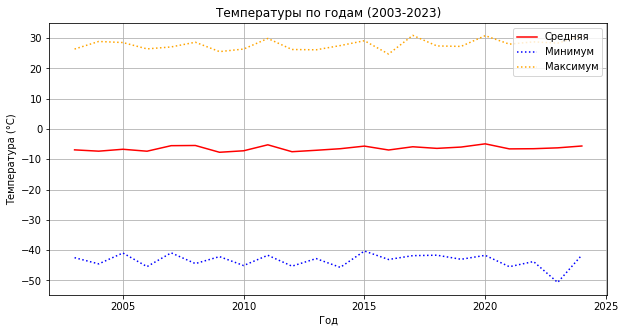

In [14]:
# Рисуем график
plt.figure(figsize=(10,5))
plt.plot(yearly_stats['mean'], color='red', label='Средняя')
plt.plot(yearly_stats['min'], color='blue', linestyle=':', label='Минимум')
plt.plot(yearly_stats['max'], color='orange', linestyle=':', label='Максимум')

plt.title('Температуры по годам (2003-2023)')
plt.xlabel('Год')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)

В Нерюнгри 20 лет держится примерно одна и та же средняя температура за год от -9°C до -5°C. Летние дни там могут быть довольно жаркими до +31°C, а зимнее время, наоборот, очень холодным - до -50°C.

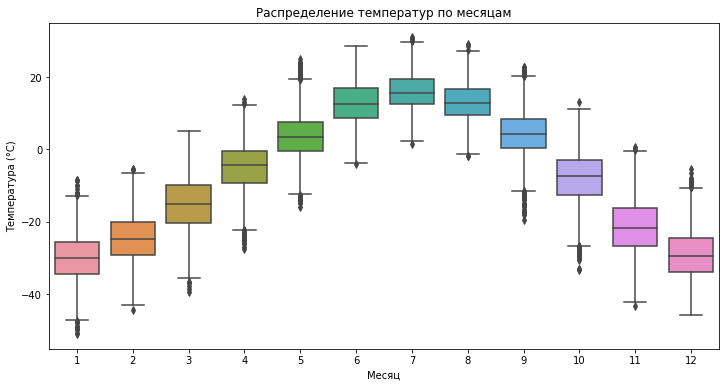

In [15]:
# Добавляем месяц и год в данные
yakt['month'] = pd.to_datetime(yakt['date']).dt.month
yakt['year'] = pd.to_datetime(yakt['date']).dt.year

plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='temperature_2m', 
            data=yakt[yakt['city_id'] == '56.6579_124.7123'])
plt.title('Распределение температур по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Температура (°C)')
plt.show()

Судя по графику, в Якутии холодное время довольно долго длится, плюсовая средняя температура начинается только с мая и длится до октября. Лето действительно очень короткое и не всегда теплое. Самый теплый месяц - июль, а самый холодный - январь.

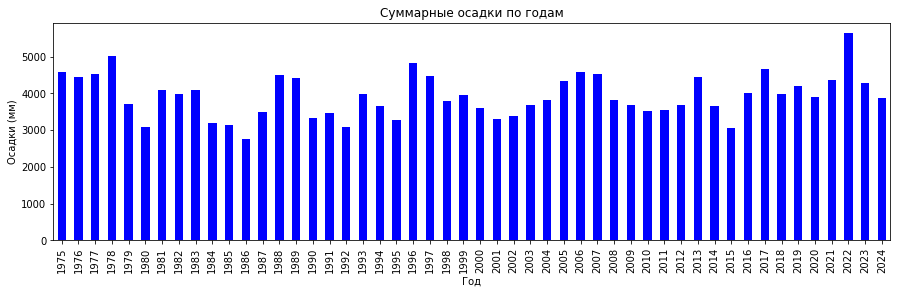

In [16]:
monthly_rain = yakt.groupby(pd.to_datetime(yakt['date']).dt.to_period('Y'))['precipitation'].sum()
monthly_rain.plot(kind='bar', figsize=(15,4), color='blue')
plt.title('Суммарные осадки по годам')
plt.xlabel('Год')
plt.ylabel('Осадки (мм)')
plt.show()

В Якутии умеренный климат, поэтому норма осадков для такого климата составляет 3000 мм. Таким образом, мы можем сказать, что Якутия довольно влажная республика, так как осадки превышают 3000 мм практически все 50 лет. 2022 год был аномально влажным, а минимум осадков было замерено в 1986 году.

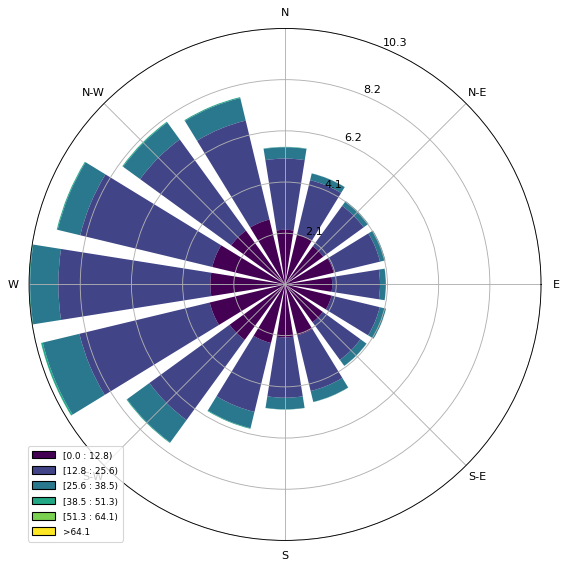

In [17]:
wind_data = yakt[['wind_direction_100m', 'wind_speed_100m']].dropna()
ax = WindroseAxes.from_ax()
ax.bar(wind_data['wind_direction_100m'], 
       wind_data['wind_speed_100m'], 
       normed=True)
ax.set_legend()
plt.show()

Основной поток ветра в Якутии идет с западного направления (дует с запада на восток). Чаще всего скорость ветра составляет от 12 до 25 м/с. Редкие случаи бывают, когда ветра нет или порывы ветра от 25 до 38 м/с.

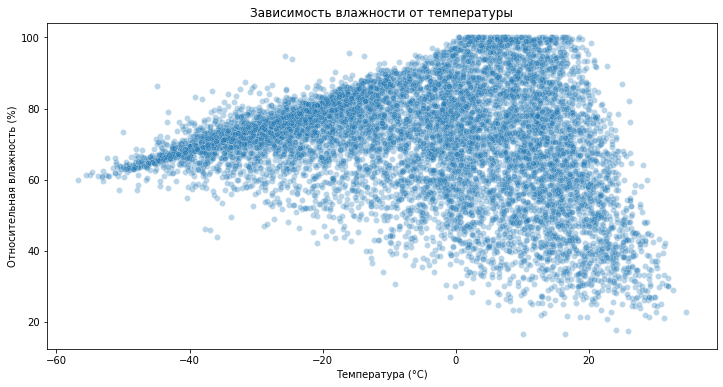

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='temperature_2m', 
                y='relative_humidity_2m',
                data=yakt.sample(10000),
                alpha=0.3)
plt.title('Зависимость влажности от температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Относительная влажность (%)')
plt.show()

В холодное время влажность обычно составляет 60%, но чем теплее становится, тем больше разброс влажности. По мере роста температуры где-то может очень влажно, вероятно, из-за дождя, а где-то может быть засуха, что может привести к лесным пожарам.

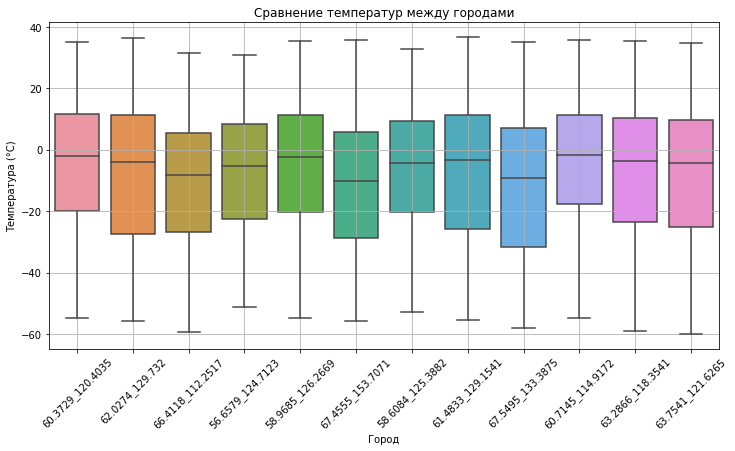

In [19]:
if len(yakt['city_id'].unique()) > 1:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='city_id', y='temperature_2m', data=yakt)
    plt.title('Сравнение температур между городами')
    plt.xlabel('Город')
    plt.ylabel('Температура (°C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Координаты 67.5495_133.3875 принадлежат городу Верхоянск, график показывает, что это самый холодный город в Республике. Хотя у города Вилюйск (63.7541_121.6265) были и более низкие температуры, достигающие -60°C. Самым теплым является Ленск (60.7145_114.9172).

# Вывод

- За 50 лет в Республике Саха (Якутия) средняя температура за год имеет тенденцию увеличиваться, а также является очень холодной Республикой. 
- В Якутии долгая зима и короткое лето, это мы подтвердили графиками. 
- В основном ветер там дует с запада на восток, его скорость колеблется от 12 до 25 м/с, но также бывают порывы до 38 м/с. 
- В холодное время влажность обычно составляет 60%, но чем теплее становится, тем больше разброс влажности от 20% до 100%.
- Мы выяснили, что в Республике самый холодный город - Верхоянск, а самый теплый - Ленск.